In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize

In [2]:
# 서울열린데이터광장 https://data.seoul.go.kr/ 에서 다운로드한 데이터를 불러왔다

# 2014년 1월 ~ 2021년 12월 서울시 월별 주택용 전력 사용량 (단위 : Mwh)
data1 = pd.read_csv('data/전력_사용량.csv')

# 2014년 1월 ~ 2021년 12월 서울시 월별 세대수 (단위 : 세대)
data2 = pd.read_csv('data/세대수.csv')

# 필요한 데이터를 ndarray 꼴로 변경
d1=np.array(data1.iloc[0,3:]).astype('float')
d2=np.array(data2.iloc[1,1:]).astype('float')

# 2014년 1월 ~ 2021년 12월 서울시 세대별 월 전력 사용량 평균 (단위 : kwh)
data3 = (d1 / d2)*1000

l = len(data3)

In [3]:
# 0.40 euro per kwh
# 552.82 won per kwh 2023년 6월 14일 환율 기준

# 결과 저장할 배열
rc = [] # 컨슈머
rp = [] # 프로슈머

# 누진제
def Pk(u):
    p = u*120.0
    if u > 200:
        p+= (u-200)*(214.6 - 120.0)
    if u > 400:
        p+= (u-400)*(307.3 - 214.6)
    return p

# 목적 함수
# 컨슈머 비용
def objective_cc(x):
    Ucp, Pcp = x
    return Pk(Uc - Ucp) + Ucp*Pcp

# 프로슈머 비용
def objective_cp(x):
    Ucp, Pcp = x
    return Pk(Up) - Ucp*Pcp

for i in data3:
    # 상수, 사용량
    Uc = i
    Up = i

    # 초기 추정치
    x0 = [Uc/2, 0.1]  # 초기 추정치를 임의로 설정

    # 변수의 범위 (제약 조건)
    bounds = [(0, Uc), (0, 307.3)]

    # minimize 함수를 사용하여 최소값 찾기
    resultc = minimize(objective_cc, x0, bounds=bounds)
    resultp = minimize(objective_cp, x0, bounds=bounds)

    # 결과 저장
    rc.append(resultc.x)
    rp.append(resultp.x)

In [4]:
def objective_c(x):
    return objective_cc(x) + objective_cp(x)

rcp=[] # 컨슈머 + 프로슈머
r = [] # 결과 상세값
for i in data3:
    # 상수, 사용량
    Uc = i
    Up = i

    # 초기 추정치
    x0 = [Uc/2, 100]  # 초기 추정치를 임의로 설정

    # 변수의 범위 (제약 조건)
    bounds = [(0, Uc), (0, 307.3)]

    # minimize 함수를 사용하여 최소값 찾기
    result = minimize(objective_c, x0, bounds=bounds)
    
    # 결과 저장
    rcp.append(result.x)
    r.append(result)

In [5]:
# 결과 중 수렴하지 않은 값 있는지 확인
for i in range(l):
    if not r[i].success:
        print(i)
# 결과 없음

In [11]:
rp

[array([283.81401229, 307.3       ]),
 array([280.45339982, 307.3       ]),
 array([245.57558818, 307.3       ]),
 array([254.49439087, 307.3       ]),
 array([239.86403911, 307.3       ]),
 array([252.66983252, 307.3       ]),
 array([267.7122178, 307.3      ]),
 array([294.16321199, 307.3       ]),
 array([265.68348188, 307.3       ]),
 array([240.60787043, 307.3       ]),
 array([252.95044455, 307.3       ]),
 array([267.84593684, 307.3       ]),
 array([287.94536315, 307.3       ]),
 array([279.57674622, 307.3       ]),
 array([247.12216487, 307.3       ]),
 array([255.44449478, 307.3       ]),
 array([238.10746219, 307.3       ]),
 array([248.18355212, 307.3       ]),
 array([262.06006651, 307.3       ]),
 array([316.51752318, 307.3       ]),
 array([273.19912724, 307.3       ]),
 array([238.14341231, 307.3       ]),
 array([250.88540916, 307.3       ]),
 array([262.56292441, 307.3       ]),
 array([281.79189889, 307.3       ]),
 array([285.64949182, 307.3       ]),
 array([255.23

In [7]:
from matplotlib import pyplot as plt

yc = [] # 컨슈머의 비용
yp = [] # 프로슈머의 비용
y = [] # 위 두 값의 합
for i in range(l):

    # 상수, 사용량
    Uc = data3[i]
    Up = data3[i]

    yc.append(objective_cc(rc[i]))
    yp.append(objective_cp(rp[i]))
    y.append(objective_c(rcp[i]))

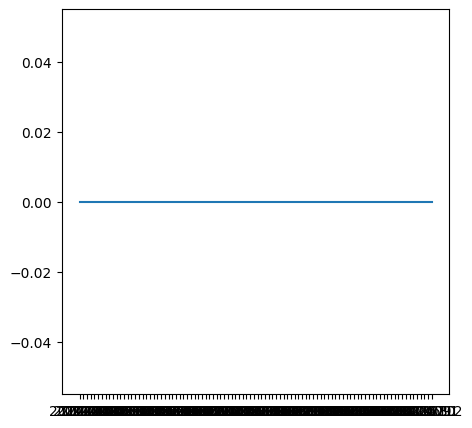

In [15]:
# 컨슈머
plt.figure(figsize=(5,5))
plt.plot(data1.columns[3:], yc)

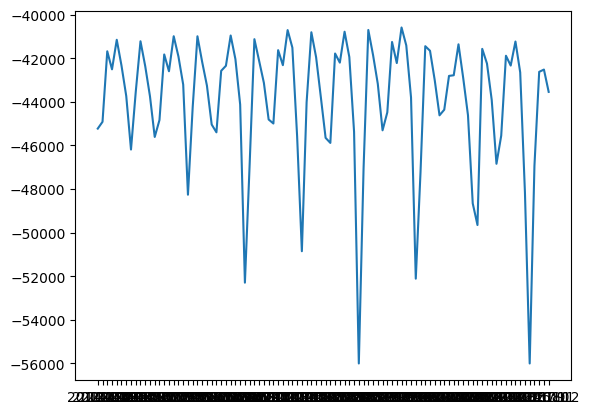

In [9]:
# 프로슈머
plt.plot(data1.columns[3:], yp)

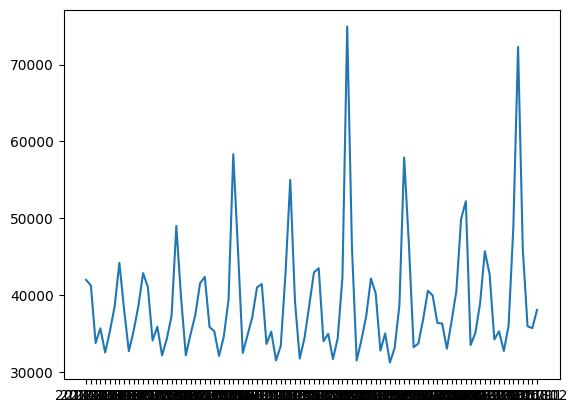

In [10]:
# 컨슈머 + 프로슈머
plt.plot(data1.columns[3:], y)